# Credit1 - Applied and got credit

This data outlines information about entities that applied for credit and got it.

## Data Variables

 **clid** - rank of (rand) contin
 
 **hhid** - rank of (rand) by a09
 
 **r01** - did you or anyone else in this household attempt to get credit in form of cash
 
 **r02** - did you or anyone else in this household secure a loan (borrow) in form of cash
 
 **r03** - Credit item number
 
 **r04** - Credit item
 
 **r05** - Household member responsible for the loan
 
 **r06** - What was the source of the credit over the last 12 months
 
 **r07** - Main reason of obtaining the loan
 
 **r08** - How much was borrowed
 
 **r09** - How long did it take to obtain the loan
 
 **r10_m** - Rate of interest per month
 
 **r10_y** - Rate of interest per annum
 
 **r11** - Repayment of loan in months
 
 **r12** - How much is outstanding
 
 **r13** - What kind of qurantee/collateral was mainly required

# Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
credit = pd.read_csv('csv files/Credit1.dta.csv')

In [7]:
credit.head()

,Unnamed: 0,clid,hhid,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10_m,r10_y,r11,r12,r13
0,0,1.0,1.0,Yes,Yes,1.0,EDUCATION LOAN,1.0,Self-Help Groups/Chamas,School Fees (Education),10000.0,NaN,10.0,NaN,6.0,4000.0,Shares
1,1,1.0,2.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Subsistence Needs,10000.0,21.0,10.0,NaN,5.0,0.0,Shares
2,2,1.0,4.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Purchase/Construction of Dwelling,4000.0,2.0,10.0,NaN,4.0,0.0,Shares
3,3,1.0,6.0,Yes,Yes,1.0,NaN,1.0,Self-Help Groups/Chamas,Subsistence Needs,20000.0,7.0,NaN,10.0,12.0,0.0,Livestock
4,4,2.0,3.0,Yes,Yes,1.0,MONEY,1.0,Merchant/Shop,School Fees (Education),20000.0,2.0,0.0,0.0,10.0,2000.0,None


In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9710 entries, 0 to 9709
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9710 non-null   int64  
 1   clid        9710 non-null   float64
 2   hhid        9710 non-null   float64
 3   r01         9710 non-null   object 
 4   r02         9698 non-null   object 
 5   r03         9421 non-null   float64
 6   r04         9342 non-null   object 
 7   r05         9419 non-null   float64
 8   r06         9413 non-null   object 
 9   r07         9408 non-null   object 
 10  r08         9411 non-null   float64
 11  r09         9382 non-null   float64
 12  r10_m       8403 non-null   float64
 13  r10_y       6798 non-null   float64
 14  r11         9359 non-null   float64
 15  r12         9401 non-null   float64
 16  r13         8945 non-null   object 
dtypes: float64(10), int64(1), object(6)
memory usage: 1.3+ MB


In [9]:
credit.describe()

,Unnamed: 0,clid,hhid,r03,r05,r08,r09,r10_m,r10_y,r11,r12
count,9710.000000,9710.000000,9710.000000,9421.000000,9419.000000,9.411000e+03,9382.000000,8403.000000,6798.000000,9359.000000,9.401000e+03
mean,4854.500000,1164.215551,5.129969,1.452287,1.363521,5.989167e+04,10.968770,4.909877,4.705149,8.762795,3.418242e+04
std,2803.179891,695.605797,2.719714,0.951243,0.621285,2.634235e+05,28.528649,14.435655,13.671089,17.234672,1.680969e+05
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2427.250000,541.000000,3.000000,1.000000,1.000000,2.000000e+03,1.000000,0.000000,0.000000,1.000000,0.000000e+00
50%,4854.500000,1159.000000,5.000000,1.000000,1.000000,6.000000e+03,1.000000,0.000000,0.000000,3.000000,1.000000e+03
75%,7281.750000,1780.750000,7.000000,2.000000,2.000000,3.000000e+04,8.000000,10.000000,7.000000,12.000000,1.000000e+04
max,9709.000000,2387.000000,10.000000,9.000000,13.000000,9.000000e+06,730.000000,500.000000,600.000000,998.000000,6.000000e+06


Let's drop the 'Unnamed' column

In [10]:
credit.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
credit.head()

,clid,hhid,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10_m,r10_y,r11,r12,r13
0,1.0,1.0,Yes,Yes,1.0,EDUCATION LOAN,1.0,Self-Help Groups/Chamas,School Fees (Education),10000.0,NaN,10.0,NaN,6.0,4000.0,Shares
1,1.0,2.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Subsistence Needs,10000.0,21.0,10.0,NaN,5.0,0.0,Shares
2,1.0,4.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Purchase/Construction of Dwelling,4000.0,2.0,10.0,NaN,4.0,0.0,Shares
3,1.0,6.0,Yes,Yes,1.0,NaN,1.0,Self-Help Groups/Chamas,Subsistence Needs,20000.0,7.0,NaN,10.0,12.0,0.0,Livestock
4,2.0,3.0,Yes,Yes,1.0,MONEY,1.0,Merchant/Shop,School Fees (Education),20000.0,2.0,0.0,0.0,10.0,2000.0,None


# Missing Data

Use seaborn's heatmap to view missing data

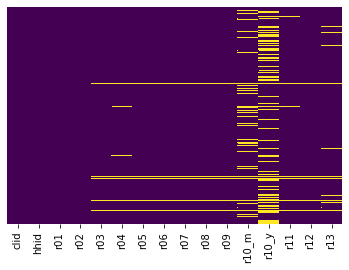

In [12]:
sns.heatmap(credit.isnull(), cbar=False, yticklabels=False, cmap='viridis')

**A method to view the actual no. of missing data points**

In [13]:
for column in credit.columns:
    print(column, '\n', credit[column].isnull().value_counts())
    print('\n')

clid 
 False    9710
Name: clid, dtype: int64


hhid 
 False    9710
Name: hhid, dtype: int64


r01 
 False    9710
Name: r01, dtype: int64


r02 
 False    9698
True       12
Name: r02, dtype: int64


r03 
 False    9421
True      289
Name: r03, dtype: int64


r04 
 False    9342
True      368
Name: r04, dtype: int64


r05 
 False    9419
True      291
Name: r05, dtype: int64


r06 
 False    9413
True      297
Name: r06, dtype: int64


r07 
 False    9408
True      302
Name: r07, dtype: int64


r08 
 False    9411
True      299
Name: r08, dtype: int64


r09 
 False    9382
True      328
Name: r09, dtype: int64


r10_m 
 False    8403
True     1307
Name: r10_m, dtype: int64


r10_y 
 False    6798
True     2912
Name: r10_y, dtype: int64


r11 
 False    9359
True      351
Name: r11, dtype: int64


r12 
 False    9401
True      309
Name: r12, dtype: int64


r13 
 False    8945
True      765
Name: r13, dtype: int64




Note that data start to miss at the 'r02' column onwards

Let's act on each column at a time

In [14]:
# View the no. of unique entries

credit['r02'].nunique()

2

In [15]:
#no. of counts

credit['r02'].value_counts()

Yes    9421
No      277
Name: r02, dtype: int64

**Since this column is somewhat related to the 'r01' column, we may use information on that column to help fill the missing data points**

In [16]:
credit['r02'].fillna('Yes', inplace=True)

In [17]:
credit['r02'].isnull().value_counts()

False    9710
Name: r02, dtype: int64

**Now on to the 'r03' column**

In [18]:
#this column has 289 missing data points

credit['r03'].value_counts()

1.0    6904
2.0    1573
3.0     490
4.0     243
5.0     125
6.0      54
7.0      19
8.0       9
9.0       4
Name: r03, dtype: int64

In [19]:
credit['r03'].isnull().value_counts()

False    9421
True      289
Name: r03, dtype: int64

Let's fill the first approximate half of the data with 1.0 and the other with 2.0

These are the two values in the column that can bring about significant change

In [20]:
credit['r03'][:5000].fillna(value=1.0, inplace=True)
credit['r03'][4999:].fillna(value=2.0, inplace=True)

In [21]:
credit['r03'].isnull().value_counts()

False    9710
Name: r03, dtype: int64

**On to the 'r04' column**

In [22]:
credit['r04'].nunique()

1925

In [23]:
credit['r04'].value_counts()

CASH                        1477
CHAMA LOAN                   376
SUGAR                        315
SACCO LOAN                   235
FOOD ITEMS                   233
                            ... 
BONDO MICRO  FINANCE           1
PURCHASE OF TV                 1
MWISHUIRI                      1
EMPSO MICROFINANCE GROUP       1
SUGAR/SOAP/OMO                 1
Name: r04, Length: 1925, dtype: int64

In [24]:
# CASH seems to be the dominant variable in this column
# there are 368 missing data points
# these alone are nearly equal to some of the variables total
# so we may fill up all the missing data with CASH

In [25]:
credit['r04'].fillna(value='CASH', inplace=True)

In [26]:
credit['r04'].isnull().value_counts()

False    9710
Name: r04, dtype: int64

**On to the 'r05' column**

In [27]:
# this column is missing 291 data points

credit['r05'].nunique()

11

In [28]:
credit['r05'].value_counts()

1.0     6341
2.0     2897
3.0      109
4.0       32
5.0       15
6.0       13
7.0        7
9.0        2
13.0       1
12.0       1
8.0        1
Name: r05, dtype: int64

In [29]:
# most of the values are 1's and 2's

print(credit['r05'].mean())
print(credit['r05'][:5000].mean())
print(credit['r05'][4999:].mean())

1.3635205435821212
1.3541881045482609
1.3733830300372725


**Let's fill the first approximate half with 1's and the rest with 2's**

In [30]:
credit['r05'][:5000].fillna(value=1.0, inplace=True)

In [31]:
credit['r05'][4999:].fillna(value=2.0, inplace=True)

In [32]:
credit['r05'].isnull().value_counts()

False    9710
Name: r05, dtype: int64

**On to the 'r06' column**

In [33]:
# this column has 297 missing data points

credit['r06'].isnull().value_counts()

False    9413
True      297
Name: r06, dtype: int64

In [34]:
credit['r06'].value_counts() 

 Merchant/Shop                   2364
 Self-Help Groups/Chamas         2070
 Relative/ Friend/Neighbour      1310
 Saccos                          1112
 Commercial Banks                 862
 Micro-Finance Inst               668
 Mobile Phone Platform            483
 Ngo                              126
 Money Lender(Shylock )           119
 Government Funds                 114
 Employer                         106
 Other                             43
 Religious Inst                    30
 Insurance Company                  3
 Mortgage  Finance                  3
Name: r06, dtype: int64

We may divide the data into 4, since the first 4 entries above are the dominant, then fill each one of them in each quarter as follows

In [35]:
credit['r06'][:2500].fillna(value='Merchant/Shop', inplace=True)
credit['r06'][2499:5000].fillna(value='Self-Help Groups/Chamas', inplace=True)
credit['r06'][4999:7500].fillna(value='Relative/ Friend/Neighbour', inplace=True)
credit['r06'][7499:].fillna(value='Saccos', inplace=True)

In [36]:
credit['r06'].isnull().value_counts()

False    9710
Name: r06, dtype: int64

**On to the 'r07' column**

In [37]:
#this column has 302 missing data points

credit['r07'].isnull().value_counts()

False    9408
True      302
Name: r07, dtype: int64

In [38]:
credit['r07'].value_counts()

Subsistence Needs                       4051
School Fees (Education)                 1891
Business/Investment                     1400
Purchase of Agricultural Inputs          486
Medical Expense                          371
Purchase/Construction of Dwelling        368
Other                                    300
Purchase of Land                         227
Purchase of Livestock                    129
Ceremony/Wedding                          86
Purchase of Motor Vehicles/Cycles         80
Purchase of Agricultural Machinery        19
Name: r07, dtype: int64

**We divide the data into 3(since there are 3 dominant entries) and fill accordingly**

In [39]:
credit['r07'][:3000].fillna(value='Subsistence Needs', inplace=True)
credit['r07'][2999:6000].fillna(value='School Fees (Education)', inplace=True)
credit['r07'][5999:].fillna(value='Business/Investment', inplace=True)

In [40]:
credit['r07'].isnull().value_counts()

False    9710
Name: r07, dtype: int64

**On to the 'r08' column**

In [41]:
# 299 missing data points

credit['r08'].isnull().value_counts()

False    9411
True      299
Name: r08, dtype: int64

In [42]:
credit['r08'].value_counts()

10000.0     616
2000.0      572
5000.0      551
20000.0     498
3000.0      448
           ... 
1650.0        1
778000.0      1
7870.0        1
5800.0        1
12800.0       1
Name: r08, Length: 392, dtype: int64

In [43]:
print(credit['r08'].mean())
print(credit['r08'].median())

59891.66783551164
6000.0


**Let's impute with the median value 6000.0**

In [44]:
credit['r08'].fillna(credit['r08'].median(), inplace=True)

In [45]:
credit['r08'].isnull().value_counts()

False    9710
Name: r08, dtype: int64

**On to the 'r09' column**

In [46]:
#328 missing data points

credit['r09'].isnull().value_counts()

False    9382
True      328
Name: r09, dtype: int64

In [47]:
credit['r09'].value_counts().head(20)

1.0      2990
0.0      1893
30.0     1027
7.0       861
2.0       575
14.0      532
3.0       370
5.0       166
60.0      164
4.0       147
90.0      126
21.0      114
10.0       83
20.0       47
15.0       27
120.0      26
180.0      24
6.0        23
150.0      18
365.0      17
Name: r09, dtype: int64

In [48]:
print(credit['r09'].mean())
print(credit['r09'].median())

10.968769985077808
1.0


**Let's apply mean to the first approximate half of the data, and median to the rest**

In [49]:
credit['r09'][:5000].fillna(value=10.0, inplace=True)
credit['r09'][4999:].fillna(value=1.0, inplace=True)

In [50]:
credit['r09'].isnull().value_counts()

False    9710
Name: r09, dtype: int64

**On to the 'r10_m' column**

In [51]:
# 1307 missing data points

credit['r10_m'].isnull().value_counts()

False    8403
True     1307
Name: r10_m, dtype: int64

In [52]:
credit['r10_m'].value_counts().head(20)

0.0     4515
10.0    1683
1.0      389
20.0     265
5.0      170
2.0      140
12.0     105
15.0      88
7.5       83
18.0      78
8.0       66
30.0      50
7.0       43
3.0       42
0.1       42
4.0       41
6.0       41
16.0      39
1.5       38
25.0      35
Name: r10_m, dtype: int64

In [53]:
print(credit['r10_m'].mean())
print(credit['r10_m'].median())

4.909877424729263
0.0


**We impute mean to the first approximate 1/3 of the data, median to the second approximate 1/3 and the value 10.0(it's dominant from the stats above) to the last approximate 1/3**

In [54]:
credit['r10_m'][:3000].fillna(value=4.0, inplace=True)
credit['r10_m'][2999:6000].fillna(value=0.0, inplace=True)
credit['r10_m'][5999:].fillna(value=10.0, inplace=True)

In [55]:
credit['r10_m'].isnull().value_counts()

False    9710
Name: r10_m, dtype: int64

**On to the 'r10_y' column**

In [56]:
# 2912 missing data points

credit['r10_y'].isnull().value_counts()

False    6798
True     2912
Name: r10_y, dtype: int64

In [57]:
credit['r10_y'].value_counts().head(20)

0.0     4847
12.0     314
10.0     263
20.0     245
18.0     173
16.0      91
15.0      86
24.0      62
5.0       46
17.0      41
21.0      40
4.0       36
1.0       35
22.0      30
14.0      29
19.0      25
2.0       22
12.5      19
13.0      18
25.0      18
Name: r10_y, dtype: int64

In [58]:
print(credit['r10_y'].mean())
print(credit['r10_y'].median())

4.705148573109738
0.0


**Note: The number of missing data points is too high**

In this case we can't impute mean to the approximate 1/2(as you may have guessed we would have done) of the data and median to the rest

This is because instances of the value 4.0 would rise past many of those outlined above, and that would render the data inconsistent

Let's design a function that is going to impute the dominant values 0.0, 12.0, 10.0, 20.0 and 18.0 randomly through the missing points 

In [59]:
values = np.array([0.0, 12.0, 10.0, 20.0, 18.0])
def imputer(colval):
    if colval == 'empty':
        np.random.shuffle(values)
        return values[0]
    else:
        return colval

In [60]:
credit['r10_y'].fillna(value='empty', inplace=True)

In [61]:
credit['r10_y'] = credit['r10_y'].apply(imputer)

In [62]:
credit.head()

,clid,hhid,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10_m,r10_y,r11,r12,r13
0,1.0,1.0,Yes,Yes,1.0,EDUCATION LOAN,1.0,Self-Help Groups/Chamas,School Fees (Education),10000.0,10.0,10.0,20.0,6.0,4000.0,Shares
1,1.0,2.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Subsistence Needs,10000.0,21.0,10.0,18.0,5.0,0.0,Shares
2,1.0,4.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Purchase/Construction of Dwelling,4000.0,2.0,10.0,18.0,4.0,0.0,Shares
3,1.0,6.0,Yes,Yes,1.0,CASH,1.0,Self-Help Groups/Chamas,Subsistence Needs,20000.0,7.0,4.0,10.0,12.0,0.0,Livestock
4,2.0,3.0,Yes,Yes,1.0,MONEY,1.0,Merchant/Shop,School Fees (Education),20000.0,2.0,0.0,0.0,10.0,2000.0,None


In [63]:
credit['r10_y'].value_counts()

0.0      5454
12.0      856
20.0      842
10.0      842
18.0      760
         ... 
288.0       1
54.0        1
29.0        1
10.4        1
44.4        1
Name: r10_y, Length: 148, dtype: int64

**Excellent !**

**On to the 'r11' column**

In [64]:
#351 missing data points

credit['r11'].isnull().value_counts()

False    9359
True      351
Name: r11, dtype: int64

In [65]:
credit['r11'].value_counts().head(20)

1.0     3244
12.0    1766
3.0      629
0.0      627
2.0      625
6.0      450
24.0     350
36.0     266
10.0     193
4.0      187
48.0     138
5.0      133
18.0     132
60.0     116
9.0      107
8.0       92
72.0      80
7.0       45
30.0      32
20.0      32
Name: r11, dtype: int64

In [66]:
print(credit['r11'].mean())
print(credit['r11'].median())

8.76279517042419
3.0


It's almost appropriate to impute with the median value

From the stats in the cell above, 3.0 which is the median value is the 3^rd most dominant variable, and again considering that there are only 351 missing data points

In [67]:
credit['r11'].fillna(value=3.0, inplace=True)

In [68]:
credit['r11'].isnull().value_counts()

False    9710
Name: r11, dtype: int64

**On to the 'r12' column**

In [69]:
# 309 missing data points

credit['r12'].isnull().value_counts()

False    9401
True      309
Name: r12, dtype: int64

In [70]:
credit['r12'].value_counts().head(20)

0.0        3456
2000.0      316
1000.0      267
5000.0      261
3000.0      250
10000.0     235
4000.0      194
500.0       175
20000.0     172
6000.0      141
30000.0     127
15000.0     122
8000.0      111
200.0       106
1500.0      101
40000.0      92
50000.0      87
7000.0       76
2500.0       74
100.0        70
Name: r12, dtype: int64

In [71]:
print(credit['r12'].mean())
print(credit['r12'].median())

34182.422082757155
1000.0


**Note**

*r08 - How much was borrowed*

*r12 - How much is outstanding*

so the sum_0f_r08 - sum_of_r12 = total_paid_amount

we can get outstanding by total_paid_amount - sum_of_r12

we can then get the mean of this and fill in the missing values

In [72]:
sum(credit['r08']) - np.sum(credit['r12'])

244085536.0

In [73]:
244085536 - np.sum(credit['r12'])

-77263414.0

That will not work, it seems that the paid in amount does not balance with the borrowed amount, arrears are to high

The only other correct option is to assume that the values missing are those of cleared transactions

And from the cells above, O.0 is dominant so we will use this reasoning to back up our idea



In [74]:
credit['r12'].fillna(value=0.0, inplace=True)

In [75]:
credit['r12'].isnull().value_counts()

False    9710
Name: r12, dtype: int64

**On to the 'r13' column; the last column**

In [76]:
# 765 missing data points

credit['r13'].isnull().value_counts()

False    8945
True      765
Name: r13, dtype: int64

In [77]:
credit['r13'].value_counts()

None                      4295
Shares                    1618
Individual/Guarantor      1252
Salary                     553
Livestock                  317
Household Goods            269
Income                     185
Other                      168
Business Stock             121
Land Title                 102
Motor Vehicle/Cycle         50
House                       15
Name: r13, dtype: int64

Let's define a function similar to the one we used for the 'r10_y' column

We will use the first 5 dominant variables

In [78]:
values2 = np.array(['None', 'Shares', 'Individual/Guarantor', 'Salary', 'Livestock'])
def imputer2(colval):
    if colval == 'empty':
        np.random.shuffle(values2)
        return values[0]
    else:
        return colval

In [79]:
credit['r13'].fillna(value='empty', inplace=True)

In [80]:
credit['r13'] = credit['r13'].apply(imputer2)

In [81]:
credit['r13'].isnull().value_counts()

False    9710
Name: r13, dtype: int64

Now all our data is imputed.

There are no missing values.

Let's use a heatmap to see that indeed there is no missing data

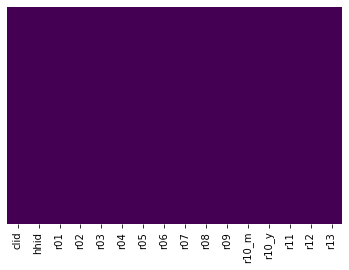

In [82]:
sns.heatmap(credit.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [83]:
credit.head()

,clid,hhid,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10_m,r10_y,r11,r12,r13
0,1.0,1.0,Yes,Yes,1.0,EDUCATION LOAN,1.0,Self-Help Groups/Chamas,School Fees (Education),10000.0,10.0,10.0,20.0,6.0,4000.0,Shares
1,1.0,2.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Subsistence Needs,10000.0,21.0,10.0,18.0,5.0,0.0,Shares
2,1.0,4.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Purchase/Construction of Dwelling,4000.0,2.0,10.0,18.0,4.0,0.0,Shares
3,1.0,6.0,Yes,Yes,1.0,CASH,1.0,Self-Help Groups/Chamas,Subsistence Needs,20000.0,7.0,4.0,10.0,12.0,0.0,Livestock
4,2.0,3.0,Yes,Yes,1.0,MONEY,1.0,Merchant/Shop,School Fees (Education),20000.0,2.0,0.0,0.0,10.0,2000.0,None


# Irregular Data (Outliers)

**A list of numerical columns**

In [84]:
numerical_cols = ['clid', 'hhid', 'r03', 'r05', 'r08', 'r09', 'r10_m', 'r10_y', 'r11', 'r12']

Let's first see if a histogram will help us to see the outliers

We'll plot a histogram for every feature/column

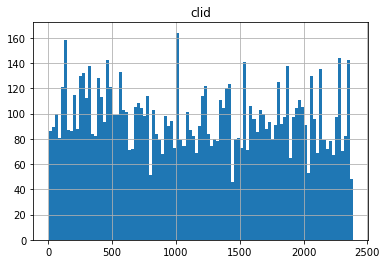

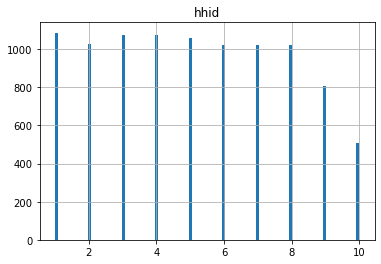

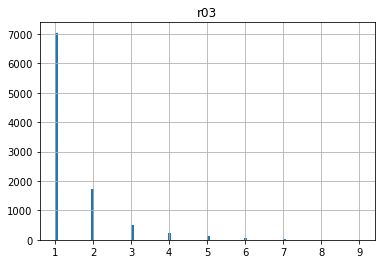

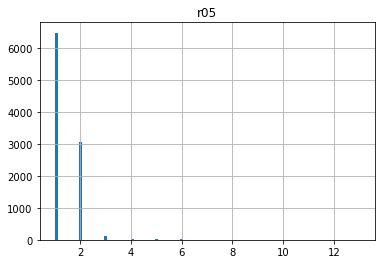

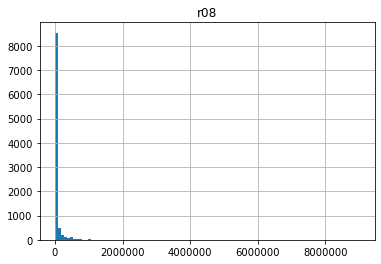

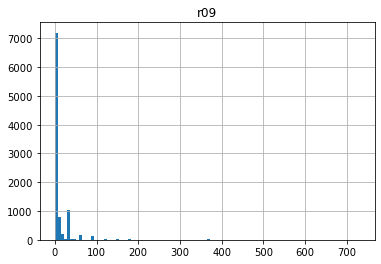

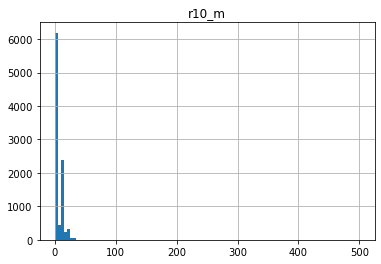

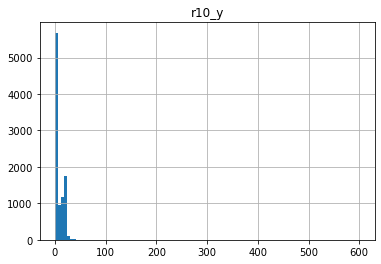

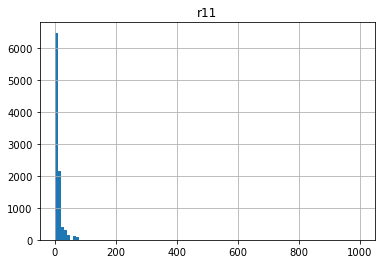

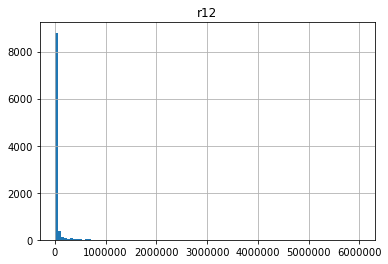

In [85]:
for col in numerical_cols:
    credit[col].hist(bins=100)
    plt.title(col)
    plt.show()

**Try boxplots**

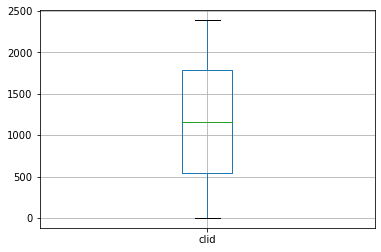

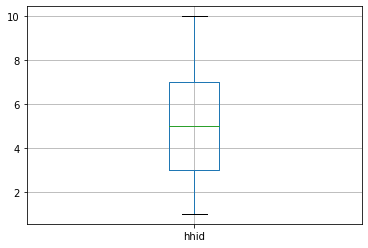

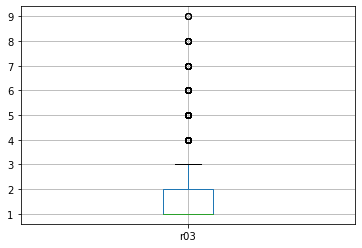

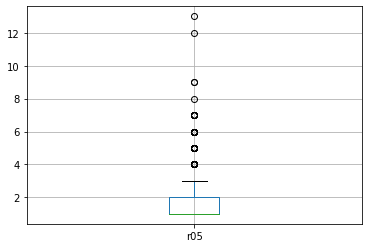

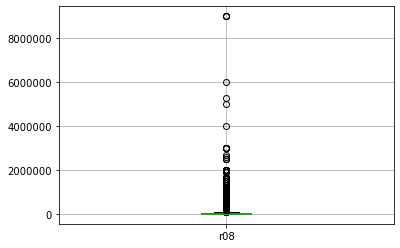

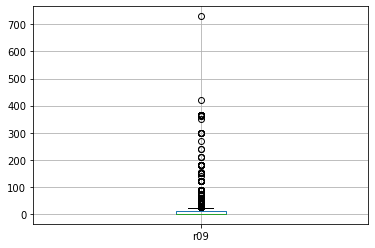

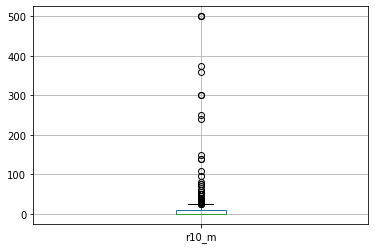

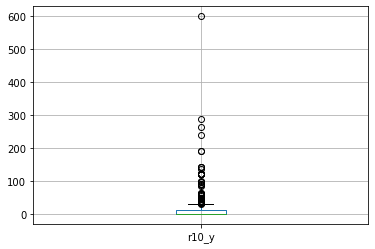

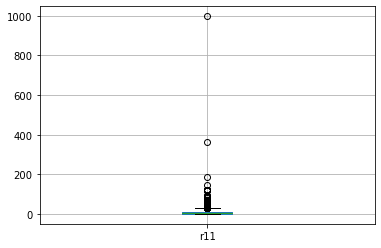

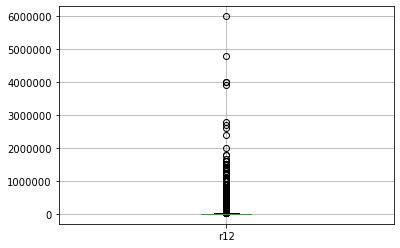

In [86]:
for col in numerical_cols:
    credit.boxplot(column=col)
    plt.show()

In [87]:
for col in numerical_cols:
    print(credit[col].sort_values(ascending=False).head())

9709    2387.0
9708    2387.0
9707    2385.0
9702    2385.0
9700    2385.0
Name: clid, dtype: float64
1345    10.0
5682    10.0
4202    10.0
8612    10.0
6456    10.0
Name: hhid, dtype: float64
1195    9.0
8100    9.0
5018    9.0
3952    9.0
2220    8.0
Name: r03, dtype: float64
8856    13.0
2558    12.0
2597     9.0
2134     9.0
2354     8.0
Name: r05, dtype: float64
1303    9000000.0
3140    9000000.0
6991    9000000.0
6702    6000000.0
477     5300000.0
Name: r08, dtype: float64
9623    730.0
860     420.0
8396    365.0
2472    365.0
5521    365.0
Name: r09, dtype: float64
606     500.0
5339    500.0
7794    500.0
5533    375.0
7795    360.3
Name: r10_m, dtype: float64
2926    600.0
1951    288.0
4010    264.0
45      240.0
1331    192.0
Name: r10_y, dtype: float64
6937    998.0
499     365.0
5265    188.0
3627    144.0
9042    120.0
Name: r11, dtype: float64
4875    6000000.0
3140    4800000.0
6702    4000000.0
876     4000000.0
871     3900000.0
Name: r12, dtype: float64


As we can see in some columns,there are values that lie far away from the others and this raises concern

We can go ahead and drop such

In [88]:
credit.drop([6937], axis=0, inplace=True)
credit.drop([9623], axis=0, inplace=True)
credit.drop([2926], axis=0, inplace=True)
credit.drop([499], axis=0, inplace=True)

# Duplicates

In [91]:
credit = credit.drop_duplicates(ignore_index=True)

In [92]:
credit.shape

(9706, 16)

There were no duplicates

In [104]:
credit.head()

,clid,hhid,r01,r02,r03,r04,r05,r06,r07,r08,r09,r10_m,r10_y,r11,r12,r13
0,1.0,1.0,Yes,Yes,1.0,EDUCATION LOAN,1.0,Self-Help Groups/Chamas,School Fees (Education),10000.0,10.0,10.0,20.0,6.0,4000.0,Shares
1,1.0,2.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Subsistence Needs,10000.0,21.0,10.0,18.0,5.0,0.0,Shares
2,1.0,4.0,Yes,Yes,1.0,LOAN,1.0,Self-Help Groups/Chamas,Purchase/Construction of Dwelling,4000.0,2.0,10.0,18.0,4.0,0.0,Shares
3,1.0,6.0,Yes,Yes,1.0,CASH,1.0,Self-Help Groups/Chamas,Subsistence Needs,20000.0,7.0,4.0,10.0,12.0,0.0,Livestock
4,2.0,3.0,Yes,Yes,1.0,MONEY,1.0,Merchant/Shop,School Fees (Education),20000.0,2.0,0.0,0.0,10.0,2000.0,None


## Clean!

On feeding this data to a machine learning algorithm that's not NLP, one will only need to drop the non-numerical features, or convert the several categorical features to dummy variables and proceed with modelling since the data cleaning process has already been done.